# Probabilistic Language Modeling

Language Models predicts the next word given the context words.

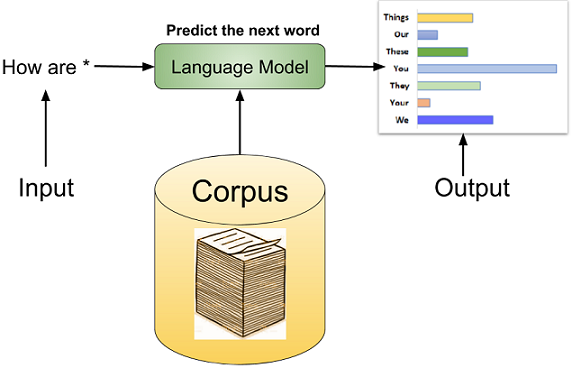

# 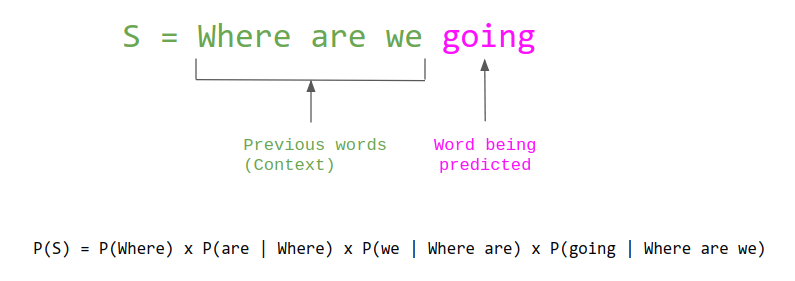

## Steps for building language Model...

1. Read corpus from scratch.
2. Tokenize the sentences of the corpus.
3. Generate n-grams from corpus.
4. Probability computations for n-grams.

In [ ]:
import nltk

## Task 1: Read the corpus from the file.

In [ ]:
sentences = ['Natural Language Processing with NLTK',
             'Natural Language gets developed over the time',
             'Language Processing is very important',
             'Natural Language Processing is an important scientific field',
             'Natural Language Analysis',
             'Natural Language Processing',
             'Natural Language Understanding',
             'Natural Language Understanding']

## Task 2: Tokenize the corpus.

Before we train our ngram models it is necessary to make sure the data we put in
them is in the right format. For example, our corpus is a collection of documents.
Here in this example, we have corpus comprises of sentences. We tokenize the
sentences of the corpus.

1. Document by document
2. Sentence by sentence

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens=[]
for sent in sentences:
    tokens.extend(nltk.word_tokenize(sent))

##  Task 3: Generate n-grams from corpus:


### Bigram generation (Word dependency on the just previous word)

In [ ]:
bigrm = list(nltk.bigrams(tokens))

In [ ]:
print(bigrm)

[('Natural', 'Language'), ('Language', 'Processing'), ('Processing', 'with'), ('with', 'NLTK'), ('NLTK', 'Natural'), ('Natural', 'Language'), ('Language', 'gets'), ('gets', 'developed'), ('developed', 'over'), ('over', 'the'), ('the', 'time'), ('time', 'Language'), ('Language', 'Processing'), ('Processing', 'is'), ('is', 'very'), ('very', 'important'), ('important', 'Natural'), ('Natural', 'Language'), ('Language', 'Processing'), ('Processing', 'is'), ('is', 'an'), ('an', 'important'), ('important', 'scientific'), ('scientific', 'field'), ('field', 'Natural'), ('Natural', 'Language'), ('Language', 'Analysis'), ('Analysis', 'Natural'), ('Natural', 'Language'), ('Language', 'Processing'), ('Processing', 'Natural'), ('Natural', 'Language'), ('Language', 'Understanding'), ('Understanding', 'Natural'), ('Natural', 'Language'), ('Language', 'Understanding')]


In [ ]:
# Counter computes the frequncy of each bigram in the corpus
from collections import Counter
bigrmCount = Counter(bigrm)

In [ ]:
for element in bigrmCount:
    print(element,bigrmCount[element])

('Natural', 'Language') 7
('Language', 'Processing') 4
('Processing', 'with') 1
('with', 'NLTK') 1
('NLTK', 'Natural') 1
('Language', 'gets') 1
('gets', 'developed') 1
('developed', 'over') 1
('over', 'the') 1
('the', 'time') 1
('time', 'Language') 1
('Processing', 'is') 2
('is', 'very') 1
('very', 'important') 1
('important', 'Natural') 1
('is', 'an') 1
('an', 'important') 1
('important', 'scientific') 1
('scientific', 'field') 1
('field', 'Natural') 1
('Language', 'Analysis') 1
('Analysis', 'Natural') 1
('Processing', 'Natural') 1
('Language', 'Understanding') 2
('Understanding', 'Natural') 1


### Trigram generation (Word dependency on the two previous words)

In [ ]:
trigrm = list(nltk.trigrams(tokens))
trigrmCount = Counter(trigrm)

In [ ]:
for element in trigrmCount:
    print(element,trigrmCount[element])

('Natural', 'Language', 'Processing') 3
('Language', 'Processing', 'with') 1
('Processing', 'with', 'NLTK') 1
('with', 'NLTK', 'Natural') 1
('NLTK', 'Natural', 'Language') 1
('Natural', 'Language', 'gets') 1
('Language', 'gets', 'developed') 1
('gets', 'developed', 'over') 1
('developed', 'over', 'the') 1
('over', 'the', 'time') 1
('the', 'time', 'Language') 1
('time', 'Language', 'Processing') 1
('Language', 'Processing', 'is') 2
('Processing', 'is', 'very') 1
('is', 'very', 'important') 1
('very', 'important', 'Natural') 1
('important', 'Natural', 'Language') 1
('Processing', 'is', 'an') 1
('is', 'an', 'important') 1
('an', 'important', 'scientific') 1
('important', 'scientific', 'field') 1
('scientific', 'field', 'Natural') 1
('field', 'Natural', 'Language') 1
('Natural', 'Language', 'Analysis') 1
('Language', 'Analysis', 'Natural') 1
('Analysis', 'Natural', 'Language') 1
('Language', 'Processing', 'Natural') 1
('Processing', 'Natural', 'Language') 1
('Natural', 'Language', 'Underst

##  Task 4: Probability computations:

1. Count( Natural, Language, Processing) / Count (Natural, Language)

2. Count( Natural, Language, Analysis) / Count (Natural, Language)

In [ ]:
# Count Probability of occuring 'Processing (word i)' given two previous words 'Natural(word i-2)' and 'Language (word i-1)'
# P(Wi / Wi-2,Wi-1)

print ('Probability of the word  \"Processing\" given the two previous words \"Natural ,Language\"  is  ' ,
       trigrmCount[('Natural','Language','Processing')]/bigrmCount[('Natural','Language')])

print ('Probability of the word  \"Analysis\" given  the two previous words \"Natural Language\"  is  ' ,
      trigrmCount[('Natural','Language','Analysis')]/bigrmCount[('Natural','Language')])

Probability of the word  "Processing" given the two previous words "Natural ,Language"  is   0.42857142857142855
Probability of the word  "Analysis" given  the two previous words "Natural Language"  is   0.14285714285714285


# Probabilistic Language Modeling - A Pythonic Way

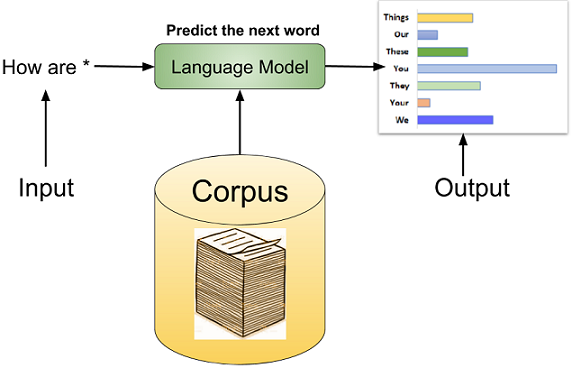

https://books.google.com/ngrams

In [ ]:
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.util import pad_sequence

from nltk import word_tokenize,sent_tokenize

In [ ]:

#text = ['Natural Language Processing with 4 NLTK5.','Language Processing is very important 123.']

# text = ['Natural Language Processing with NLTK',
#              'Natural Language gets developed over the time',
#              'Language Processing is very important',
#              'Natural Language Processing is an important scientific field',
#              'Natural Language Analysis',
#              'Natural Language Processing',
#              'Natural Language Understanding',
#              'Natural Language Understanding',
#              'Natural Lang Processing']

text = open('/home/lmcorpus.txt',encoding='utf8').readlines()

FileNotFoundError: ignored

### Preprocessing the corpus ... Sentenize, Tokenize, Puncuation Removal, Digits Removal, etc.

In [ ]:
# Sentenization
# Tokenization

tokenized_text = []
tokenized_text = [[word.lower() for word in nltk.word_tokenize(sent)] for sent in text]

tokenized_text

[['natural', 'language', 'processing', 'with', 'nltk', '.'],
 ['natural', 'language', 'gets', 'developed', 'over', 'the', 'time', '.'],
 ['language', 'processing', 'is', 'very', 'important', '.'],
 ['natural',
  'language',
  'processing',
  'is',
  'an',
  'important',
  'scientific',
  'field',
  '.'],
 ['natural', 'language', 'analysis', ','],
 ['natural', 'language', 'processing', ','],
 ['natural', 'language', 'understanding', ','],
 ['natural', 'language', 'understanding']]

In [ ]:
# Remove punctuations symbols from the documents

import string

# Fetch all punctuation symbols in the list named 'punctuations []'

punctuations = list(string.punctuation)

tokenized_text = [[word for word in sent if word not in punctuations] for sent in tokenized_text]

tokenized_text

[['natural', 'language', 'processing', 'with', 'nltk'],
 ['natural', 'language', 'gets', 'developed', 'over', 'the', 'time'],
 ['language', 'processing', 'is', 'very', 'important'],
 ['natural',
  'language',
  'processing',
  'is',
  'an',
  'important',
  'scientific',
  'field'],
 ['natural', 'language', 'analysis'],
 ['natural', 'language', 'processing'],
 ['natural', 'language', 'understanding'],
 ['natural', 'language', 'understanding']]

In [ ]:
# Remove numerical strings from the documents

tokenized_text = [[word for word in sent if not word.isdigit()] for sent in tokenized_text]

tokenized_text


# Remove the alphanumeric (digit-blended) words

tokenized_text = [[word for word in sent if word.isalpha()] for sent in tokenized_text]

tokenized_text[0:2]

[['natural', 'language', 'processing', 'with', 'nltk'],
 ['natural', 'language', 'gets', 'developed', 'over', 'the', 'time']]

### Remove blended digits from words

### Calling the function 'remove_digits_from_words()' for each sentence of the tokenized_text

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
bigrammodel = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance
for sentence in tokenized_text:
    for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>"):
        bigrammodel[w1][w2] += 1

# Let's Transform the counts to probabilities

for w1 in bigrammodel:
    total_count = float(sum(bigrammodel[w1].values()))
    for w2 in bigrammodel[w1]:
        bigrammodel[w1][w2] /= total_count

In [ ]:
dict(bigrammodel["<s>"])
#dict(bigrammodel["natural"])

{'natural': 0.875, 'language': 0.125}

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
trigrammodel = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance
for sentence in tokenized_text:
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>"):
        trigrammodel[(w1, w2)][w3] += 1

# Let's Transform the counts to probabilities

for w1_w2 in trigrammodel:
    total_count = float(sum(trigrammodel[w1_w2].values()))
    for w3 in trigrammodel[w1_w2]:
        trigrammodel[w1_w2][w3] /= total_count

In [ ]:
dict(trigrammodel["<s>","natural"])

{'language': 1.0}

# Language Modeling with from nltk.util import everygrams
## from nltk.lm.preprocessing import padded_everygram_pipeline

### No starting or ending of sentence explicitely marked.

It is noticable that 'b' occurs as first and second word. But we have not taken care to check how often the sentence starts
with 'a' and ends with 'c'.

In [ ]:
list(bigrams(tokenized_text[0]))

[('natural', 'language'),
 ('language', 'processing'),
 ('processing', 'with'),
 ('with', 'nltk')]

### Padding starting and ending symbol for each sentences.

Hence, we can also model the statistics about how likely the sentence starts with a particular word.
For instance, How likely the sentence starts with the word 'Natural'.

In [ ]:
from nltk.util import pad_sequence
padded_tokenized_text = list(pad_sequence(tokenized_text[0],
                  pad_left=True,
                  pad_right=True,
                  left_pad_symbol="<s>",
                  right_pad_symbol="</s>",
                  n=2))

In [ ]:
list(nltk.bigrams(padded_tokenized_text))

[('<s>', 'natural'),
 ('natural', 'language'),
 ('language', 'processing'),
 ('processing', 'with'),
 ('with', 'nltk'),
 ('nltk', '</s>')]

In [ ]:
list(nltk.ngrams(padded_tokenized_text,n=2))

[('<s>', 'natural'),
 ('natural', 'language'),
 ('language', 'processing'),
 ('processing', 'with'),
 ('with', 'nltk'),
 ('nltk', '</s>')]

In [ ]:
from nltk.lm.preprocessing import pad_both_ends
list(pad_both_ends(tokenized_text[0],n=3))

list(ngrams(pad_both_ends(tokenized_text[0],n=3),n=3))

[('<s>', '<s>', 'natural'),
 ('<s>', 'natural', 'language'),
 ('natural', 'language', 'processing'),
 ('language', 'processing', 'with'),
 ('processing', 'with', 'nltk'),
 ('with', 'nltk', '</s>'),
 ('nltk', '</s>', '</s>')]

### To prepare for the model building

Computing every possible ngrams upto upper bound

In [ ]:
from nltk.util import everygrams

In [ ]:
list(everygrams(padded_tokenized_text,max_len=2))

[('<s>',),
 ('<s>', 'natural'),
 ('natural',),
 ('natural', 'language'),
 ('language',),
 ('language', 'processing'),
 ('processing',),
 ('processing', 'with'),
 ('with',),
 ('with', 'nltk'),
 ('nltk',),
 ('nltk', '</s>'),
 ('</s>',)]

### To build the vocabulary.... To identify the words appeard in the corpus and those which did not...

In [ ]:
from nltk.lm.preprocessing import flatten
from pprint import pprint

In [ ]:
pprint(list(flatten(pad_both_ends(sent,n=2) for sent in tokenized_text)))

['<s>',
 'natural',
 'language',
 'processing',
 'with',
 'nltk',
 '</s>',
 '<s>',
 'natural',
 'language',
 'gets',
 'developed',
 'over',
 'the',
 'time',
 '</s>',
 '<s>',
 'language',
 'processing',
 'is',
 'very',
 'important',
 '</s>',
 '<s>',
 'natural',
 'language',
 'processing',
 'is',
 'an',
 'important',
 'scientific',
 'field',
 '</s>',
 '<s>',
 'natural',
 'language',
 'analysis',
 '</s>',
 '<s>',
 'natural',
 'language',
 'processing',
 '</s>',
 '<s>',
 'natural',
 'language',
 'understanding',
 '</s>',
 '<s>',
 'natural',
 'language',
 'understanding',
 '</s>']


### The same corpus is used for ngram counts and vocabulary

padded_everygram_pipeline output two lazy iterators object.
The vocabualry and the everygram upto some value n.
They are called at the time of training.

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
n=3
trained_data,vocab = padded_everygram_pipeline(n,tokenized_text)

In [ ]:
# Iterating over both iterators, to print the values
for ngram_sent in trained_data:
    print(list(ngram_sent))
    print()
print('----------------------------------------------------------------------------------------------------------------------')

print(list(vocab))

[('<s>',), ('<s>', '<s>'), ('<s>', '<s>', 'natural'), ('<s>',), ('<s>', 'natural'), ('<s>', 'natural', 'language'), ('natural',), ('natural', 'language'), ('natural', 'language', 'processing'), ('language',), ('language', 'processing'), ('language', 'processing', 'with'), ('processing',), ('processing', 'with'), ('processing', 'with', 'nltk'), ('with',), ('with', 'nltk'), ('with', 'nltk', '</s>'), ('nltk',), ('nltk', '</s>'), ('nltk', '</s>', '</s>'), ('</s>',), ('</s>', '</s>'), ('</s>',)]

[('<s>',), ('<s>', '<s>'), ('<s>', '<s>', 'natural'), ('<s>',), ('<s>', 'natural'), ('<s>', 'natural', 'language'), ('natural',), ('natural', 'language'), ('natural', 'language', 'gets'), ('language',), ('language', 'gets'), ('language', 'gets', 'developed'), ('gets',), ('gets', 'developed'), ('gets', 'developed', 'over'), ('developed',), ('developed', 'over'), ('developed', 'over', 'the'), ('over',), ('over', 'the'), ('over', 'the', 'time'), ('the',), ('the', 'time'), ('the', 'time', '</s>'), ('ti

### Training an N-gram Model

In [ ]:
from nltk.lm import MLE

In [ ]:
# Lets train a 3-grams model, previously we set n=2 (for bigram model)

# We create the instance of the Maximum Likelihood Estimation. It does not have any data yet.

model = MLE(3)

In [ ]:
from nltk.lm import Vocabulary

In [ ]:
# Initially it shows zero as it lazy iterator, when we fit the data, it gets filled.
len(model.vocab)

0

In [ ]:
vocab = Vocabulary(list(flatten(pad_both_ends(sent,n=2) for sent in tokenized_text)), unk_cutoff=1)

In [ ]:
model.fit(trained_data,vocab)

In [ ]:
len(model.vocab)

22

In [ ]:
print(model.vocab.lookup(['a','natural']))

('<UNK>', 'natural')


In [ ]:
print(model.vocab.lookup(['natural','language','processing']))

('natural', 'language', 'processing')


In [ ]:
print(model.counts)

<NgramCounter with 1 ngram orders and 0 ngrams>


In [ ]:
model.counts['language'] # i.e. Count('language')

0